In [1]:
import pandas as pd
import jieba
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import re

In [2]:
raw_data = pd.read_csv('data.csv',encoding='utf-8')
raw_data

,position,company,salary,city,work_years,education,desc,domain,stage,scale
0,资深数据分析师,快手X3招聘,20k-40k,北京,经验3-5年,本科及以上,职位描述：职位描述1、以一定定量方法解决产品、运营、战略相关的各种复杂商业分析问题，能独立完...,文娱丨内容,D轮及以上,2000人以上
1,高级数据分析师,华晨宝马招聘,25k-35k,北京,经验5-10年,本科及以上,职位描述：责任•设计，创建，编码和支持各种HadoopETL解决方案（可能包括但不限于：Py...,汽车丨出行,未融资,2000人以上
2,数据分析,快手运营分析组招聘,8k-10k,成都,经验1-3年,本科及以上,职位描述：岗位职责:1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；2、负...,文娱丨内容,D轮及以上,2000人以上
3,大数据分析,步峰信息招聘,15k-30k,北京,经验3-5年,大专及以上,职位描述：岗位职责：1、有从事分布式数据存储与计算平台应用开发经验，熟悉Hadoop生态相关...,"移动互联网,企业服务",不需要融资,50-150人
4,大数据分析,步峰信息招聘,15k-25k,北京,经验3-5年,本科及以上,职位描述：1、有从事分布式数据存储与计算平台应用开发经验，熟悉Hadoop生态相关技术并有相...,"移动互联网,企业服务",不需要融资,50-150人
...,...,...,...,...,...,...,...,...,...,...
375,数据分析师,作文纸条招聘,15k-25k,广州,经验5-10年,本科及以上,职位描述：岗位职责：1、对接日常数据需求并评估需求合理性，主导规划并建立业务核心数据指标体系...,"移动互联网,教育",A轮,红杉资本、纪源资本(A轮)，微光创投；正念资本；熊猫资本；一号公路资本(天使轮)
376,资深数据分析专员,搜狐集团广告营销部招聘,8k-13k,北京,经验3-5年,本科及以上,职位描述：岗位职责:1.根据公司政策，对业务伙伴进行相应的营销分析、计算；2.负责公司业务数...,"移动互联网,广告营销",上市公司,2000人以上
377,商业数据分析负责人,驰骛科技ChiefClouds商业数据分析部门招聘,25k-40k,上海,经验5-10年,本科及以上,职位描述：职位描述：1、负责与客户需求部门沟通数据分析需求，协助创造数据驱动场景；2、负责客...,"数据服务,移动互联网",A轮,50-150人
378,高级商业数据分析师,居理新房数据运营部招聘,10k-15k,北京,经验1-3年,硕士及以上,职位描述：居理新房(Julive)——一站式购房平台作为国内**数据驱动的新房电商平台，我们...,移动互联网,C轮,祥峰投资(B轮)，源码资本(A轮)，k2vc(天使轮)


In [3]:
# 前期清洗
# 过滤掉实习岗位
intership = raw_data['position'].str.contains(u'实习',regex=False)
raw_data = raw_data[~intership]
raw_data.reset_index(drop=True, inplace=True)
raw_data

,position,company,salary,city,work_years,education,desc,domain,stage,scale
0,资深数据分析师,快手X3招聘,20k-40k,北京,经验3-5年,本科及以上,职位描述：职位描述1、以一定定量方法解决产品、运营、战略相关的各种复杂商业分析问题，能独立完...,文娱丨内容,D轮及以上,2000人以上
1,高级数据分析师,华晨宝马招聘,25k-35k,北京,经验5-10年,本科及以上,职位描述：责任•设计，创建，编码和支持各种HadoopETL解决方案（可能包括但不限于：Py...,汽车丨出行,未融资,2000人以上
2,数据分析,快手运营分析组招聘,8k-10k,成都,经验1-3年,本科及以上,职位描述：岗位职责:1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；2、负...,文娱丨内容,D轮及以上,2000人以上
3,大数据分析,步峰信息招聘,15k-30k,北京,经验3-5年,大专及以上,职位描述：岗位职责：1、有从事分布式数据存储与计算平台应用开发经验，熟悉Hadoop生态相关...,"移动互联网,企业服务",不需要融资,50-150人
4,大数据分析,步峰信息招聘,15k-25k,北京,经验3-5年,本科及以上,职位描述：1、有从事分布式数据存储与计算平台应用开发经验，熟悉Hadoop生态相关技术并有相...,"移动互联网,企业服务",不需要融资,50-150人
...,...,...,...,...,...,...,...,...,...,...
363,数据分析师,作文纸条招聘,15k-25k,广州,经验5-10年,本科及以上,职位描述：岗位职责：1、对接日常数据需求并评估需求合理性，主导规划并建立业务核心数据指标体系...,"移动互联网,教育",A轮,红杉资本、纪源资本(A轮)，微光创投；正念资本；熊猫资本；一号公路资本(天使轮)
364,资深数据分析专员,搜狐集团广告营销部招聘,8k-13k,北京,经验3-5年,本科及以上,职位描述：岗位职责:1.根据公司政策，对业务伙伴进行相应的营销分析、计算；2.负责公司业务数...,"移动互联网,广告营销",上市公司,2000人以上
365,商业数据分析负责人,驰骛科技ChiefClouds商业数据分析部门招聘,25k-40k,上海,经验5-10年,本科及以上,职位描述：职位描述：1、负责与客户需求部门沟通数据分析需求，协助创造数据驱动场景；2、负责客...,"数据服务,移动互联网",A轮,50-150人
366,高级商业数据分析师,居理新房数据运营部招聘,10k-15k,北京,经验1-3年,硕士及以上,职位描述：居理新房(Julive)——一站式购房平台作为国内**数据驱动的新房电商平台，我们...,移动互联网,C轮,祥峰投资(B轮)，源码资本(A轮)，k2vc(天使轮)


In [4]:
# 职位工资清洗
# 查看工资列是否存在格式不为“数字k-数字k"的情况
raw_data['salary'].str.contains(r'\s*\d+k-\d+k\s*',regex=True).all()

True

In [5]:
# 格式符合，利用正则表达式提取，提取平均工资
salary_df = raw_data['salary'].str.extract(r'\s*(\d+)k-(\d+)k\s*', expand=True).rename(columns={0:'min_salary',1:'max_salary'})
salary_df['max_salary'] = salary_df['max_salary'].astype(np.int)*1000
salary_df['min_salary'] = salary_df['min_salary'].astype(np.int)*1000
salary_df['avg_salary'] = salary_df[['min_salary','max_salary']].mean(axis=1).astype(np.int)
raw_data = pd.concat([raw_data,salary_df], axis=1).drop('salary', axis=1)
raw_data

,position,company,city,work_years,education,desc,domain,stage,scale,min_salary,max_salary,avg_salary
0,资深数据分析师,快手X3招聘,北京,经验3-5年,本科及以上,职位描述：职位描述1、以一定定量方法解决产品、运营、战略相关的各种复杂商业分析问题，能独立完...,文娱丨内容,D轮及以上,2000人以上,20000,40000,30000
1,高级数据分析师,华晨宝马招聘,北京,经验5-10年,本科及以上,职位描述：责任•设计，创建，编码和支持各种HadoopETL解决方案（可能包括但不限于：Py...,汽车丨出行,未融资,2000人以上,25000,35000,30000
2,数据分析,快手运营分析组招聘,成都,经验1-3年,本科及以上,职位描述：岗位职责:1、负责团队业务、人员指标建立及数据体系搭建，以衡量团队运营能力；2、负...,文娱丨内容,D轮及以上,2000人以上,8000,10000,9000
3,大数据分析,步峰信息招聘,北京,经验3-5年,大专及以上,职位描述：岗位职责：1、有从事分布式数据存储与计算平台应用开发经验，熟悉Hadoop生态相关...,"移动互联网,企业服务",不需要融资,50-150人,15000,30000,22500
4,大数据分析,步峰信息招聘,北京,经验3-5年,本科及以上,职位描述：1、有从事分布式数据存储与计算平台应用开发经验，熟悉Hadoop生态相关技术并有相...,"移动互联网,企业服务",不需要融资,50-150人,15000,25000,20000
...,...,...,...,...,...,...,...,...,...,...,...,...
363,数据分析师,作文纸条招聘,广州,经验5-10年,本科及以上,职位描述：岗位职责：1、对接日常数据需求并评估需求合理性，主导规划并建立业务核心数据指标体系...,"移动互联网,教育",A轮,红杉资本、纪源资本(A轮)，微光创投；正念资本；熊猫资本；一号公路资本(天使轮),15000,25000,20000
364,资深数据分析专员,搜狐集团广告营销部招聘,北京,经验3-5年,本科及以上,职位描述：岗位职责:1.根据公司政策，对业务伙伴进行相应的营销分析、计算；2.负责公司业务数...,"移动互联网,广告营销",上市公司,2000人以上,8000,13000,10500
365,商业数据分析负责人,驰骛科技ChiefClouds商业数据分析部门招聘,上海,经验5-10年,本科及以上,职位描述：职位描述：1、负责与客户需求部门沟通数据分析需求，协助创造数据驱动场景；2、负责客...,"数据服务,移动互联网",A轮,50-150人,25000,40000,32500
366,高级商业数据分析师,居理新房数据运营部招聘,北京,经验1-3年,硕士及以上,职位描述：居理新房(Julive)——一站式购房平台作为国内**数据驱动的新房电商平台，我们...,移动互联网,C轮,祥峰投资(B轮)，源码资本(A轮)，k2vc(天使轮),10000,15000,12500


In [6]:
# 城市清洗
# 检查城市文字是否存在重复
raw_data.city.drop_duplicates()

0      北京
2      成都
5      上海
9      厦门
28     深圳
29     广州
32     郑州
34     杭州
39     南京
47     天津
50     昆明
63     重庆
82     武汉
89     太原
95     佛山
110    苏州
111    东莞
241    济南
244    西安
Name: city, dtype: object

In [7]:
# 清洗工作经验
# 查看工资列是否存在格式不为“数字年-数字年"的情况
with_num = raw_data['work_years'].str.contains(r'\s*\w*\d+-\d+\w*\s*',regex=True)
raw_data[~with_num]['work_years'].drop_duplicates()

5     经验应届毕业生
26       经验不限
33     经验1年以下
Name: work_years, dtype: object

In [8]:
# 检索不为“数字年-数字年"的情况后发现不要求经验。将这部分数据改为”经验不限“
raw_data['work_years'] = raw_data['work_years'].replace(['经验应届毕业生','经验不限','经验1年以下'], value='经验不限')
# 清洗后数据一览
raw_data['work_years'].drop_duplicates()

0     经验3-5年
1    经验5-10年
2     经验1-3年
5       经验不限
Name: work_years, dtype: object

In [9]:
# 检索学历要求
raw_data['education'].drop_duplicates()

0     本科及以上
3     大专及以上
8     硕士及以上
24     学历不限
Name: education, dtype: object

In [10]:
# 数据可视化
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

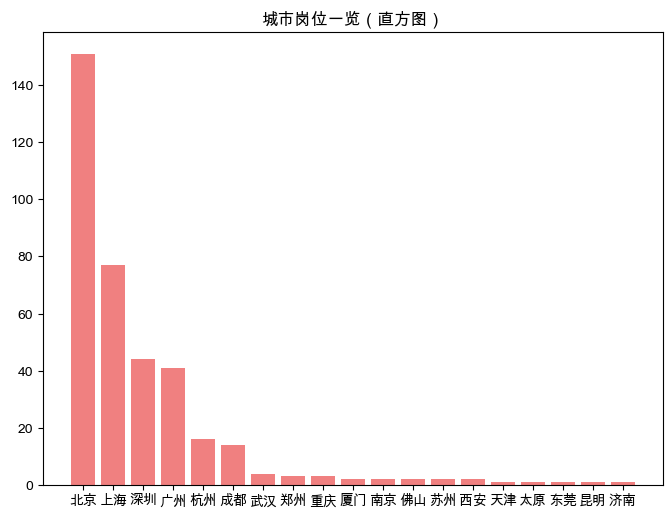

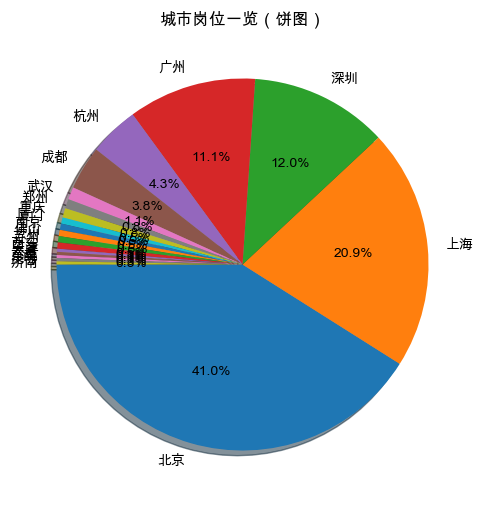

In [11]:
# 根据城市岗位一览
# 数值
city_df = pd.DataFrame({'city':[],'count':[]})
city_df['city'] = raw_data['city']
city_df = city_df.groupby('city').agg({'count':np.size})
city_df = city_df.sort_values(by='count',ascending=False)
city_df
# 画图
# 直方图
plt.figure(figsize=(8,6),dpi=100)
labels = city_df.index
data = city_df.to_numpy()
data = [x for y in data for x in y]
width = 0.8
plt.bar(x=labels, height=data, color ='lightcoral', width=width)
plt.title('城市岗位一览（直方图）')
# # 饼图
plt.figure(figsize=(6,8),dpi=100)
labels = city_df.index
values = city_df.iloc[:,0]
plt.pie(values,labels=labels,startangle=180,shadow=True,autopct='%1.1f%%')
plt.title('城市岗位一览（饼图）')
plt.show()

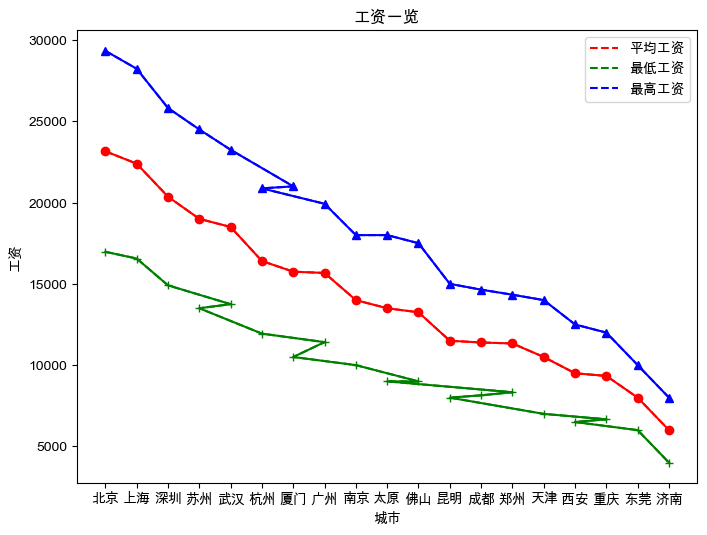

In [12]:
# 工资一览
# 最高工资
max_salary_df = pd.DataFrame({'city': [], 'max_salary': []})
max_salary_df.max_salary = raw_data.max_salary
max_salary_df.city = raw_data.city
max_salary_df = max_salary_df.groupby(['city']).agg(np.mean)
max_salary_df = max_salary_df.sort_values(by='max_salary', ascending=False)
# # 最低工资
min_salary_df = pd.DataFrame({'city': [], 'min_salary': []})
min_salary_df.min_salary = raw_data.min_salary
min_salary_df.city = raw_data.city
min_salary_df = min_salary_df.groupby(['city']).agg(np.mean)
min_salary_df = min_salary_df.sort_values(by='min_salary', ascending=False)
# 平均工资
avg_salary_df = pd.DataFrame({'city': [], 'avg_salary': []})
avg_salary_df.avg_salary = raw_data.avg_salary
avg_salary_df.city = raw_data.city
avg_salary_df = avg_salary_df.groupby(['city']).agg(np.mean)
avg_salary_df = avg_salary_df.sort_values(by='avg_salary', ascending=False)
# # 可视化
plt.figure(figsize=(8,6),dpi=100)
x1= avg_salary_df.avg_salary.index
y1= avg_salary_df.avg_salary.to_numpy()
x2= min_salary_df.min_salary.index
y2= min_salary_df.min_salary.to_numpy()
x3= max_salary_df.max_salary.index
y3= max_salary_df.max_salary.to_numpy()
l1=plt.plot(x1,y1,'r--',label='平均工资')
l2=plt.plot(x2,y2,'g--',label='最低工资')
l3=plt.plot(x3,y3,'b--',label='最高工资')
plt.plot(x1,y1,'ro-',x2,y2,'g+-',x3,y3,'b^-')
plt.title('工资一览')
plt.xlabel('城市')
plt.ylabel('工资')
plt.legend()
plt.show()

In [13]:
# 根据学历要求一览
edu_df = pd.DataFrame({'education':[],'count':[]})
edu_df.education = raw_data.education
edu_df.groupby('education').agg({'count':np.size})

,count
education,
大专及以上,24.0
学历不限,13.0
本科及以上,321.0
硕士及以上,10.0


In [14]:
# 根据工作经验一览（爬取的是社招页面，存在幸存者偏差）
expr_df = pd.DataFrame({'expr':[],'count':[]})
expr_df.expr = raw_data.work_years
expr_df.groupby('expr').agg({'count':np.size})

,count
expr,
经验1-3年,98.0
经验3-5年,172.0
经验5-10年,48.0
经验不限,50.0


In [15]:
# 对于职位描述进行词频统计
# 采用中文停用词表作为stopwords
# https://github.com/goto456/stopwords/blob/master/cn_stopwords.txt
stopwords=pd.read_csv("stopwords.txt",sep="\n",encoding='utf-8')
stopwords

,$
0,0
1,1
2,2
3,3
4,4
...,...
740,！
741,，
742,：
743,；


In [16]:
# replace by stopwords
jd = []
for string in raw_data['desc']:
    for word in stopwords.iloc[:,0]:
        string = string.replace(' ','').replace(word,'')
    jd.append(string)
jd_words = pd.DataFrame({'词汇':[], '计数':[]})
for sentence in jd:
    for index, word in enumerate(jieba.cut_for_search(sentence)):
        jd_words.loc[index, '词汇'] = word
jd_stat = jd_words.groupby(by=['词汇']).agg({'计数': np.size})
jd_stat = jd_stat.sort_values('计数', ascending=False).head(45)
jd_stat

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/k0/njd85xnn2hv3xdc_vgblhm640000gn/T/jieba.cache
Loading model cost 0.496 seconds.
Prefix dict has been built successfully.


,计数
词汇,
.,16.0
模型,10.0
业务,8.0
,8.0
数,7.0
金融,5.0
评分,5.0
风险,5.0
优先,5.0


In [17]:
# 数据清洗
not_words = ['.', ',', '~']
jd_stat.drop(not_words, inplace=True)
for index in jd_stat.index:
    if len(index) < 2:
        jd_stat.drop(index, inplace=True)
jd_stat

,计数
词汇,
模型,10.0
业务,8.0
金融,5.0
评分,5.0
风险,5.0
优先,5.0
建模,5.0
分析,4.0
熟悉,4.0


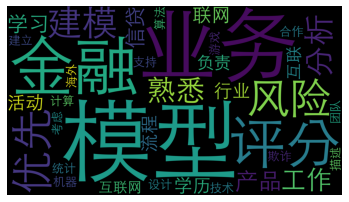

<Figure size 432x288 with 0 Axes>

In [18]:
# 设置词云
word_count = {x:y for x,y in jd_stat.itertuples()}
pic = plt.imread('pic.jpg')
wc = WordCloud(
    background_color='black',
    width=1000,
    height=800,
    mask=pic,
    font_path="STHeiti.ttc",
    random_state=42,
    max_words=100
)
wc.generate_from_frequencies(word_count)
plt.imshow(wc)
plt.axis('off')
plt.figure()
plt.show()  #显示图片
wc.to_file('new.png')